In [1]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from feature_engine.creation import CyclicalFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df_bank=pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [3]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [475]:
df_bank.shape

(41188, 21)

In [476]:
df_bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [477]:
df_bank.eq('').sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [478]:
df_bank.eq('unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [479]:
pd.crosstab(df_bank['job'],df_bank['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


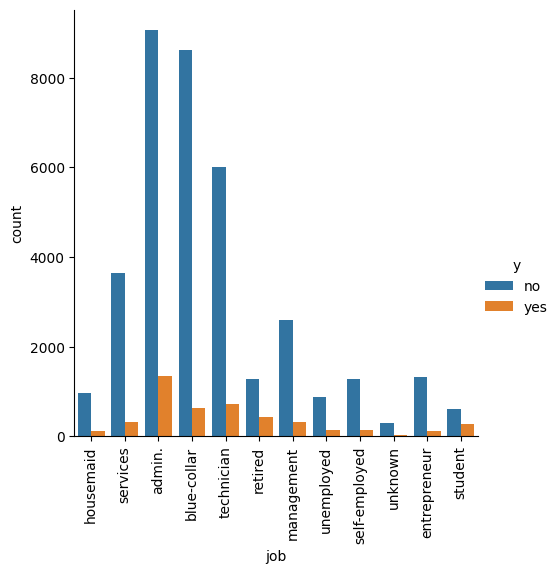

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='job',hue='y',data=df_bank,kind='count')
plt.xticks(rotation=90)
plt.show()

In [481]:
pd.crosstab(df_bank['housing'],df_bank['y'])

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


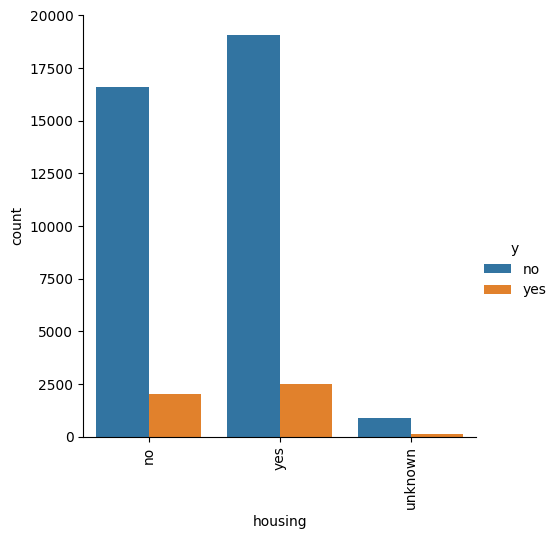

In [482]:
sns.catplot(x='housing',hue='y',data=df_bank,kind='count')
plt.xticks(rotation=90)
plt.show()

In [483]:
pd.crosstab(df_bank['loan'],df_bank['y'])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


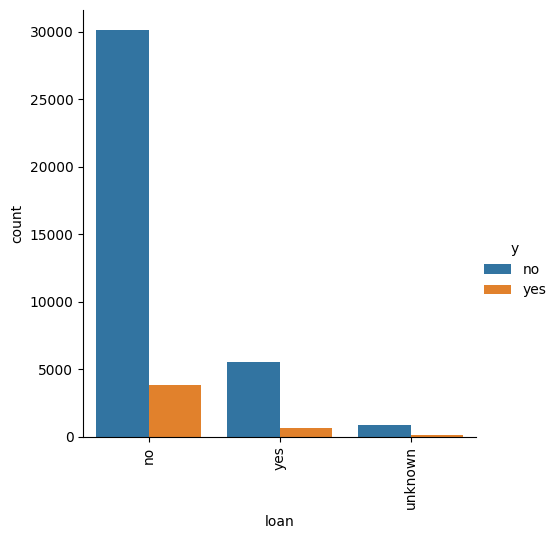

In [484]:
sns.catplot(x='loan',hue='y',data=df_bank,kind='count')
plt.xticks(rotation=90)
plt.show()

In [485]:
pd.crosstab(df_bank['education'],df_bank['y'])

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


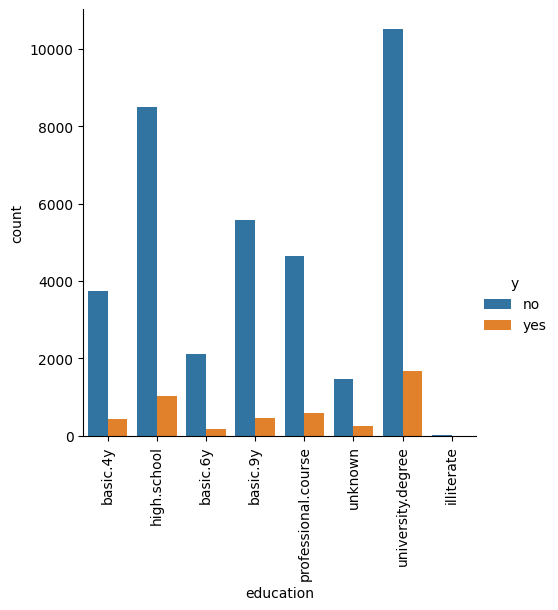

In [486]:
sns.catplot(x='education',hue='y',data=df_bank,kind='count')
plt.xticks(rotation=90)
plt.show()

In [487]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [488]:
pd.crosstab(df_bank['default'],df_bank['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


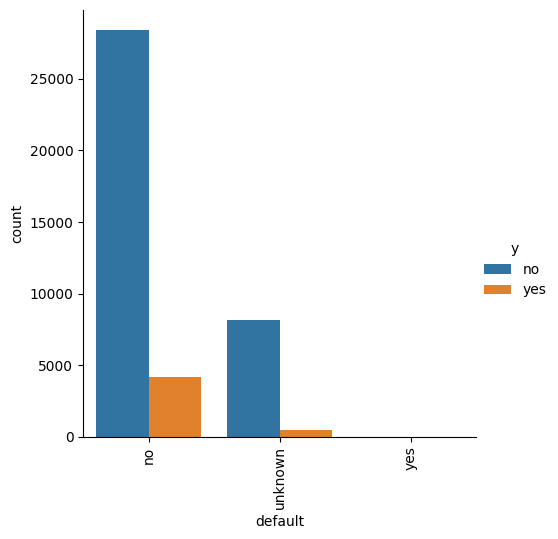

In [489]:
sns.catplot(x='default',hue='y',data=df_bank,kind='count')
plt.xticks(rotation=90)
plt.show()

In [490]:
df_bank.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [4]:
df_bank.shape

(41188, 21)

In [5]:
def preprocess(df_bank):
  df_bank.drop('default',axis=1)
  df_bank['y']=df_bank['y'].replace({'yes':1,'no':0})
  cat_col=[col for col in df_bank.columns.values if df_bank[col].dtype=='object']


  df_cat=df_bank[cat_col] 
  df_num= df_bank.drop(cat_col,axis=1)

  df_cat_dum= pd.get_dummies(df_cat,drop_first=True)
  df_bank=pd.concat([df_num,df_cat_dum], axis=1)
  scaler=StandardScaler()

  
  X=df_bank.drop('y',axis=1)
  X=scaler.fit_transform(df_bank)
  y=df_bank['y']

  return X,y
  print(df_bank)
preprocess(df_bank)

(array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.4960667 ,
          0.39770593, -0.1857    ],
        [ 1.62899323, -0.42150051, -0.56592197, ..., -0.4960667 ,
          0.39770593, -0.1857    ],
        [-0.29018564, -0.12451981, -0.56592197, ..., -0.4960667 ,
          0.39770593, -0.1857    ],
        ...,
        [ 1.53303429, -0.26722482, -0.20490853, ..., -0.4960667 ,
          0.39770593, -0.1857    ],
        [ 0.38152696,  0.70856893, -0.56592197, ..., -0.4960667 ,
          0.39770593, -0.1857    ],
        [ 3.26029527, -0.07438021,  0.15610492, ..., -0.4960667 ,
         -2.51442063, -0.1857    ]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 41183    1
 41184    0
 41185    0
 41186    1
 41187    0
 Name: y, Length: 41188, dtype: int64)

In [6]:
class LogisticRegression:
    
    def __init__(self, X, y, learningRate, maxIteration, tolerance, index=None, lrtest=False):
        self.train_X = X
        self.train_y = y
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.tolerance = tolerance
        self.index = index
        self.lrtest = lrtest
   
    def addX0(self, X):
        np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1-y) * np.log(1 - sig)
        cost = - loss.sum()
        return cost
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        losses = []
        prev_loss = float('inf')
        
        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_loss = self.costFunction(X, y)
            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)
            
            if diff_loss < self.tolerance:
                print("The model stopped learning")
                break
                
            prev_loss = current_loss
            
        self.plot_cost(losses)
        
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def fit(self):
        self.w = np.ones(self.train_X.shape[1], dtype=np.float64)
        
        if self.index!=None:
            self.remove_index(self.index)
        
        print(self.train_X.shape)
        
        if self.lrtest == True:
            print("Finding the best Learning rate, solving using gradient descent")
            self.lr_test(self.train_X, self.train_y)
        
        else:
            print("Solving using gradient descent")
            self.gradientDescent(self.train_X, self.train_y)
            
            print("Evaluate the training results")
            y_hat_train = self.predict(self.train_X)
        
            recall, precision, f_score = self.evaluationFunction(self.train_y, y_hat_train)
            print("The recall of the model is {}".format(recall))
            print("The precision of the model is {}".format(precision))
            print("The F1 score of the model is {}".format(f_score))
        
            #self.plot()
            #self.scatterPlt()
            #self.plot3D()
        
    def lr_test(self, X, y):
        alphas = [0.1e-5, 0.5e-5, 0.1e-4, 0.5e-4, 0.1e-3, 0.5e-3, 0.1e-2, 0.01, 0.1]
        for lr in alphas:
            losses = []
            prev_loss = float('inf')
            for i in tqdm(range(self.maxIteration), colour = 'red'):
                self.w = self.w - lr * self.gradient(X, y)
                current_loss = self.costFunction(X, y)
                diff_loss = np.abs(prev_loss - current_loss)
                losses.append(current_loss)
            
                if diff_loss < self.tolerance:
                    print("The model stopped learning")
                    break
                
                prev_loss = current_loss
            
            self.plot_cost(losses)
            print("Evaluate the training results")
            y_hat_train = self.predict(self.train_X)
            print("Learning rate: ", lr)
            recall, precision, f_score = self.evaluationFunction(self.train_y, y_hat_train)
            print("The recall of the model is {}".format(recall))
            print("The precision of the model is {}".format(precision))
            print("The F1 score of the model is {}".format(f_score))
        
    def evaluationFunction(self, y, y_hat):
        
        y = (y==1)
        y_hat = (y_hat==1)
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        f_score = 2 * (precision * recall) / (precision + recall)
        
        return recall, precision, f_score
    
    def plot_cost(self, cost_sequence):
        #Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel='iterations', ylabel='cost', title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()

In [7]:
train_df, test_df = train_test_split(df_bank, test_size=0.2)
print(train_df.shape, test_df.shape)
train_X,train_y=preprocess(train_df)
print(train_X.shape)
print(train_y.shape)

(32950, 21) (8238, 21)
(32950, 54)
(32950,)


(32950, 54)
Solving using gradient descent


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-6-6a44e9eb8a9f>:21: RuntimeWarning: divide by zero encountered in log
  loss = y * np.log(sig) + (1-y) * np.log(1 - sig)
<ipython-input-6-6a44e9eb8a9f>:37: RuntimeWarning: invalid value encountered in double_scalars
  diff_loss = np.abs(prev_loss - current_loss)
100%|██████████| 10000/10000 [02:09<00:00, 77.19it/s]


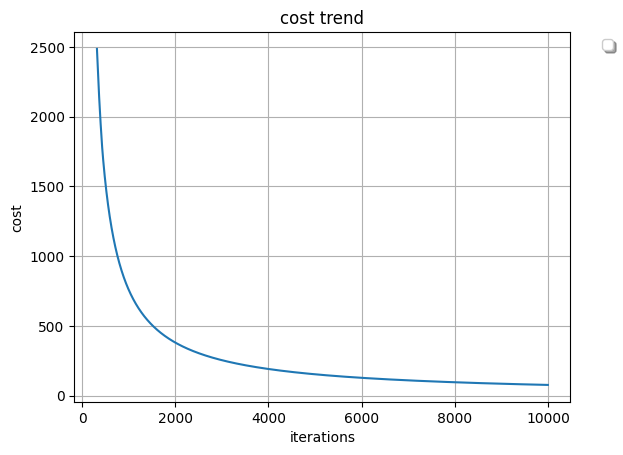

Evaluate the training results
The recall of the model is 1.0
The precision of the model is 1.0
The F1 score of the model is 1.0
[ 1.57765755e-02  1.81054246e-01 -2.48521384e-03  6.16050725e-01
  4.72743011e-02 -2.46913720e-01  2.24438980e-01  1.77160452e-02
 -1.94646966e-01  1.07455406e-01  1.64994631e+01  2.85213546e-02
  5.71961138e-03  1.75207892e-02  1.98339619e-03  1.92571089e-02
  1.55423618e-03  6.15142688e-03  8.46327039e-03  8.86828558e-03
  7.22744699e-03 -1.30038832e-03  2.32696063e-03 -2.03192955e-03
 -1.90227179e-03  4.18210906e-02  5.73259995e-02  8.88462965e-02
  6.87796870e-03  6.93035233e-02  1.05476311e-01  4.07143279e-02
  2.17096122e-03  3.01036643e-04  7.63131842e-04 -1.98406806e-03
  7.63131842e-04  1.43435313e-03 -1.88776748e-03  2.95853252e-01
  5.17586539e-02  2.59297992e-01  1.61986442e-01  1.14915537e-01
  2.43254793e-01  2.01322439e-01  8.87367484e-02  7.61933630e-02
 -1.46926849e-02 -1.19394157e-03 -8.06460141e-03 -5.19642104e-03
  6.88704898e-02  7.1144833

In [8]:
clf = LogisticRegression(train_X,train_y, learningRate=0.1e-4, maxIteration=10000, tolerance=0.00)
clf.fit()
print(clf.w)

In [10]:
test_X, test_y = preprocess(test_df)
test_y_hat = clf.predict(test_X)
clf.evaluationFunction(test_y, test_y_hat)

(1.0, 1.0, 1.0)